# Wine data classification
This MLP Classifier classifies the data obtained different wine samples. Classifier learns using 11 features from the collected data. We have seven classes based on quality of wine samples(3 to 9)

In [1]:
#importing packages
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
data_set=pd.read_csv('winewhite.csv')
df=pd.DataFrame(data_set)
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.3             0.300         0.34            1.60      0.049   
1               8.1             0.280         0.40            6.90      0.050   
2               7.2             0.230         0.32            8.50      0.058   
3               7.2             0.230         0.32            8.50      0.058   
4               8.1             0.280         0.40            6.90      0.050   
5               6.2             0.320         0.16            7.00      0.045   
6               7.0             0.270         0.36           20.70      0.045   
7               6.3             0.300         0.34            1.60      0.049   
8               8.1             0.220         0.43            1.50      0.044   
9               8.1             0.270         0.41            1.45      0.033   
10              8.6             0.230         0.40            4.20      0.035   
11              7.9         

In [2]:
print('A look at the data')
print(df.head(),'\n')

print ('Number of columns and rows of the data ')
print(df.shape,'\n')
df.columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulphur dioxide','dencity','pH','suphates','alcohol','quality']
print('Columns titles')
print(df.columns,'\n')

print ('Description of the data')
print(df.describe(),'\n')

print ('Types of data values')
print(df.dtypes, '\n')

#identify nans
def num_missing(x):
    return sum(x.isnull())
#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0),'\n') 

A look at the data
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.3              0.30         0.34             1.6      0.049   
1            8.1              0.28         0.40             6.9      0.050   
2            7.2              0.23         0.32             8.5      0.058   
3            7.2              0.23         0.32             8.5      0.058   
4            8.1              0.28         0.40             6.9      0.050   

   free sulfur dioxide  total suphur dioxide  density    pH  sulphates  \
0                 14.0                 132.0   0.9940  3.30       0.49   
1                 30.0                  97.0   0.9951  3.26       0.44   
2                 47.0                 186.0   0.9956  3.19       0.40   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  quality  
0      9.5        6  
1     10.1        6  
2

In [3]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [4]:
array=df.values
# separate feature and target values
X=array[:,0:11]
#print(X)
#the target column: quality
#Y=df['quality']
Y=array[:,11]
print(Y.shape)

(4897,)


#Random over sampling for handling imbalanced classes

In [5]:
ros = RandomOverSampler()
X_ros, Y_ros = ros.fit_sample(X, Y)
print(Y_ros.shape)

(15379,)


In [6]:
#train and split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_ros , Y_ros, test_size=0.25, random_state =789,stratify=Y_ros)
#print(Y_test)

#Applying standard scalar (Data is coverted so that mean=0 and SD=1)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Training the classifier...
Since stratified split is used for splitting train and test data, model converges faster 

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(11,9,7),activation='tanh',solver='adam',max_iter=1000,verbose=True,random_state=789,batch_size=200)
#clf = sklearn.linear_model.LogisticRegressionCV()
#clf.fit(X, Y)
mlp.fit(X_train,Y_train)

Iteration 1, loss = 2.05559493
Iteration 2, loss = 1.84867119
Iteration 3, loss = 1.70590747
Iteration 4, loss = 1.61026397
Iteration 5, loss = 1.53955041
Iteration 6, loss = 1.48325875
Iteration 7, loss = 1.43624609
Iteration 8, loss = 1.39628734
Iteration 9, loss = 1.36193262
Iteration 10, loss = 1.33131432
Iteration 11, loss = 1.30405191
Iteration 12, loss = 1.27967660
Iteration 13, loss = 1.25683409
Iteration 14, loss = 1.23602572
Iteration 15, loss = 1.21628867
Iteration 16, loss = 1.19785679
Iteration 17, loss = 1.18022222
Iteration 18, loss = 1.16352016
Iteration 19, loss = 1.14645648
Iteration 20, loss = 1.13122595
Iteration 21, loss = 1.11513327
Iteration 22, loss = 1.09963190
Iteration 23, loss = 1.08398114
Iteration 24, loss = 1.06884032
Iteration 25, loss = 1.05415092
Iteration 26, loss = 1.03981425
Iteration 27, loss = 1.02643451
Iteration 28, loss = 1.01396218
Iteration 29, loss = 1.00217107
Iteration 30, loss = 0.99169650
Iteration 31, loss = 0.98162965
Iteration 32, los

Iteration 253, loss = 0.69785358
Iteration 254, loss = 0.69752328
Iteration 255, loss = 0.69679923
Iteration 256, loss = 0.69694875
Iteration 257, loss = 0.69657881
Iteration 258, loss = 0.69634242
Iteration 259, loss = 0.69598865
Iteration 260, loss = 0.69557166
Iteration 261, loss = 0.69490656
Iteration 262, loss = 0.69484837
Iteration 263, loss = 0.69461625
Iteration 264, loss = 0.69410777
Iteration 265, loss = 0.69426800
Iteration 266, loss = 0.69393749
Iteration 267, loss = 0.69340915
Iteration 268, loss = 0.69310649
Iteration 269, loss = 0.69290954
Iteration 270, loss = 0.69245464
Iteration 271, loss = 0.69230272
Iteration 272, loss = 0.69175562
Iteration 273, loss = 0.69143227
Iteration 274, loss = 0.69124309
Iteration 275, loss = 0.69112229
Iteration 276, loss = 0.69045390
Iteration 277, loss = 0.69042011
Iteration 278, loss = 0.68979913
Iteration 279, loss = 0.68930254
Iteration 280, loss = 0.68939661
Iteration 281, loss = 0.68882927
Iteration 282, loss = 0.68880702
Iteration 

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=200, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(11, 9, 7), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=789,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

#Plotting the loss curve

Text(0,0.5,'Loss')

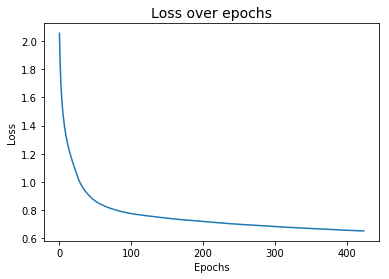

In [10]:
plt.plot((mlp.loss_curve_))
plt.title("Loss over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')

#Making predictions with test data...

In [11]:
predictions = mlp.predict(X_test)

#Training accuracy 

In [12]:
actr=accuracy_score(Y_train,mlp.predict(X_train))
print(actr*100,"%")

72.83683024102653 %


In [13]:
#No of test data instances correctly classified

In [14]:
accuracy_score(Y_test, predictions,normalize=False)

2687

In [15]:
#Testing accuracy 

In [16]:
act=accuracy_score(Y_test, predictions)
print(act*100,"%")

69.88296488946683 %


#Confusion matrix
#A confusion matrix is a table that is often used to describe the performance  of a classifier in supervised learning.

In [17]:
m=(confusion_matrix(Y_test,predictions))
print(m)
print("No of correctly classified data in class Quality3:",m[0][0])
print("No of correctly classified data in class Quality4:",m[1][1])
print("No of correctly classified data in class Quality5:",m[2][2])
print("No of correctly classified data in class Quality6:",m[3][3])
print("No of correctly classified data in class Quality7:",m[4][4],)
print("No of correctly classified data in class Quality8:",m[5][5],)
print("No of correctly classified data in class Quality9:",m[6][6],)

[[549   0   0   0   0   0   0]
 [  0 419  81  27  18   4   0]
 [  8  86 322  69  51  13   1]
 [  7  55 155 103 180  48   2]
 [  1  21  19  65 330 113   0]
 [  0   5   2   5 122 415   0]
 [  0   0   0   0   0   0 549]]
No of correctly classified data in class Quality3: 549
No of correctly classified data in class Quality4: 419
No of correctly classified data in class Quality5: 322
No of correctly classified data in class Quality6: 103
No of correctly classified data in class Quality7: 330
No of correctly classified data in class Quality8: 415
No of correctly classified data in class Quality9: 549


#Classification report
#Recall is the number of true positives divided by the number of true positives plus the number of false negatives
#Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives
#F1 score conveys balance between precision and recall.

In [18]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

        3.0       0.97      1.00      0.99       549
        4.0       0.72      0.76      0.74       549
        5.0       0.56      0.59      0.57       550
        6.0       0.38      0.19      0.25       550
        7.0       0.47      0.60      0.53       549
        8.0       0.70      0.76      0.73       549
        9.0       0.99      1.00      1.00       549

avg / total       0.68      0.70      0.69      3845

